# Part 1

## Code taken from ECS766_Lab04

In [1]:
from sqlalchemy import create_engine
from cubes.tutorial.sql import create_table_from_csv

engine = create_engine('sqlite:///data.sqlite')
create_table_from_csv(engine,
                      "./Supplementary_Material_Week05_Lab/IBRD_Balance_Sheet__FY2010.csv",
                      table_name="ibrd_balance",
                      fields=[
                          ("category", "string"),
                          ("category_label", "string"),
                          ("subcategory", "string"),
                          ("subcategory_label", "string"),
                          ("line_item", "string"),
                          ("year", "integer"),
                          ("amount", "integer")],
                      create_id=True
                     )
from cubes import Workspace
import cubes as cubes

workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")
workspace.import_model("./Supplementary_Material_Week05_Lab/tutorial_model.json")
cube = workspace.cube("ibrd_balance")
browser = workspace.browser(cube)

# Question 1

#### A)
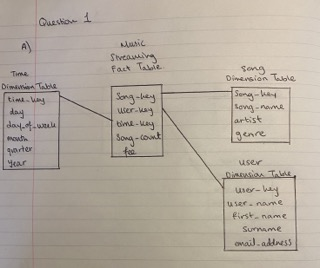

#### B)
1. Use roll-up operation to get from day to month to year.
2. Slice for year = "2021"
3. Drill-down from year = 2021 to months. (Resulting in all the months of year 2021)
4. Slice for month = "October"
5. Slice for song = "given_song"
6. Roll-up from individual users to all users.
7. Slice for users = "all"
8. Return a list of total fee collected for a given song played in October 2021


#### C)
Using the equation $$T = Π(Li+1)$$
$$i=o...n$$

Time dimension: has 5 levels including all so $(5)^1$

Song and User dimensions: have 2 levels including all so $(2)^2$

Total number of cubes = $\dot {(5)^1 (2)^2} = 20$

# Question 2
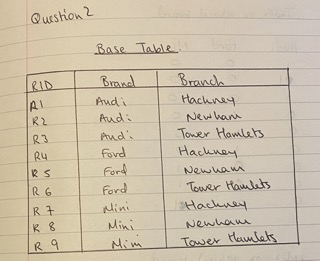

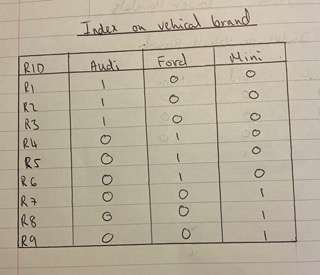

# Question 3

#### Modified "tutorial_model.json" file
- Note under cubes that functions "max" and "min" were added

In [2]:
{
    "dimensions": [
        {
         "name":"item",
         "levels": [
                {
                    "name":"category",
                    "label":"Category",
                    "attributes": ["category", "category_label"]
                },
                {
                    "name":"subcategory",
                    "label":"Sub-category",
                    "attributes": ["subcategory", "subcategory_label"]
                },
                {
                    "name":"line_item",
                    "label":"Line Item",
                    "attributes": ["line_item"]
                }
            ]
        },
        {"name":"year", "role": "time"}
    ],
    "cubes": [
        {
            "name": "ibrd_balance",
            "dimensions": ["item", "year"],
            "measures": [{"name":"amount", "label":"Amount"}],
            "aggregates": [
                    {
                        "name": "amount_sum",
                        "function": "sum",
                        "measure": "amount"
                
                    },
                    {
                        "name": "record_count",
                        "function": "count"
                    },
                    {
                        "name":"amount_min",
                        "measure":"amount",
                        "function":"min"
                    },
                    {
                        "name":"amount_max",
                        "measure":"amount",
                        "function":"max"}
                ],
            "mappings": {
                          "item.line_item": "line_item",
                          "item.subcategory": "subcategory",
                          "item.subcategory_label": "subcategory_label",
                          "item.category": "category",
                          "item.category_label": "category_label"
                         },
            "info": {
                "min_date": "2010-01-01",
                "max_date": "2010-12-31"
            }
        }
    ]
}


{'dimensions': [{'name': 'item',
   'levels': [{'name': 'category',
     'label': 'Category',
     'attributes': ['category', 'category_label']},
    {'name': 'subcategory',
     'label': 'Sub-category',
     'attributes': ['subcategory', 'subcategory_label']},
    {'name': 'line_item', 'label': 'Line Item', 'attributes': ['line_item']}]},
  {'name': 'year', 'role': 'time'}],
 'cubes': [{'name': 'ibrd_balance',
   'dimensions': ['item', 'year'],
   'measures': [{'name': 'amount', 'label': 'Amount'}],
   'aggregates': [{'name': 'amount_sum',
     'function': 'sum',
     'measure': 'amount'},
    {'name': 'record_count', 'function': 'count'},
    {'name': 'amount_min', 'measure': 'amount', 'function': 'min'},
    {'name': 'amount_max', 'measure': 'amount', 'function': 'max'}],
   'mappings': {'item.line_item': 'line_item',
    'item.subcategory': 'subcategory',
    'item.subcategory_label': 'subcategory_label',
    'item.category': 'category',
    'item.category_label': 'category_label'}

In [3]:
result = browser.aggregate(drilldown=["year"])
for record in result:
    print(record,'\n')

{'year': 2009, 'amount_sum': 550840, 'record_count': 31, 'amount_min': -1683, 'amount_max': 110040} 

{'year': 2010, 'amount_sum': 566020, 'record_count': 31, 'amount_min': -3043, 'amount_max': 128577} 



# Question 4
### A)

In [4]:
# loading table and populating it with the country-income.csv file
engine = create_engine('sqlite:///data.sqlite')
create_table_from_csv(engine,
                      "./Supplementary_Material_Week05_Lab/country-income.csv",
                      table_name="country_income",
                      fields=[
                          ("region", "string"),
                          ("age", "integer"),
                          ("income", "integer"),
                          ("online_shopper", "string")],
                      create_id=True
                     )
# creating cube to enable OLAP operations to be made
workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")
workspace.import_model("./income_model.json")
cube = workspace.cube("country_income")
browser = workspace.browser(cube)




#### Below is the code for the income_model.json file created for this country-income.csv file

In [5]:
{
    "dimensions": [
        {
         "name":"item",
         "levels": [
                {
                    "name":"region",
                    "label":"Region",
                    "attributes": ["region"]
                },
                {
                    "name":"online_shopper",
                    "label":"Online-Shopper",
                    "attributes": ["online_shopper"]
                }
            ]
        },
        {
         "name":"online_shopper",
         "levels": [
                {
                    "name":"online_shopper",
                    "label":"Online-Shopper",
                    "attributes": ["online_shopper"]
                }
            ]
        },
        {"name":"age", "role": "time"}
    ],
    "cubes": [
        {
            "name": "country_income",
            "dimensions": ["item", "online_shopper","age"],
            "measures": [{"name":"income", "label":"Income"}],
            "aggregates": [
                    {
                        "name": "income_sum",
                        "function": "sum",
                        "measure": "income"
                
                    },
                    {
                        "name": "record_count",
                        "function": "count"
                    },
                    {
                        "name":"income_min",
                        "measure":"income",
                        "function":"min"
                    },
                    
                    {
                        "name":"income_max",
                        "measure":"income",
                        "function":"max"
                    },
                    {
                        "name":"income_avg",
                        "measure":"income",
                        "function":"avg"
                    }
                ],
            "mappings": {
                          "item.region": "region",
                          "item.online_shopper": "online_shopper"
                         },
            "info": {
                "min_date": "2010-01-01",
                "max_date": "2010-12-31"
            }
        }
    ]
}



{'dimensions': [{'name': 'item',
   'levels': [{'name': 'region', 'label': 'Region', 'attributes': ['region']},
    {'name': 'online_shopper',
     'label': 'Online-Shopper',
     'attributes': ['online_shopper']}]},
  {'name': 'online_shopper',
   'levels': [{'name': 'online_shopper',
     'label': 'Online-Shopper',
     'attributes': ['online_shopper']}]},
  {'name': 'age', 'role': 'time'}],
 'cubes': [{'name': 'country_income',
   'dimensions': ['item', 'online_shopper', 'age'],
   'measures': [{'name': 'income', 'label': 'Income'}],
   'aggregates': [{'name': 'income_sum',
     'function': 'sum',
     'measure': 'income'},
    {'name': 'record_count', 'function': 'count'},
    {'name': 'income_min', 'measure': 'income', 'function': 'min'},
    {'name': 'income_max', 'measure': 'income', 'function': 'max'},
    {'name': 'income_avg', 'measure': 'income', 'function': 'avg'}],
   'mappings': {'item.region': 'region',
    'item.online_shopper': 'online_shopper'},
   'info': {'min_date'

### B)

##### Results for entire cube

In [6]:
result = browser.aggregate()
result.summary

{'income_sum': 768200,
 'record_count': 10,
 'income_min': 57600,
 'income_max': 99600,
 'income_avg': 76820.0}

##### Results per region

In [7]:
result = browser.aggregate(drilldown=["item"])
for record in result:
    print(record,'\n')

{'item.region': 'Brazil', 'income_sum': 193200, 'record_count': 3, 'income_min': 57600, 'income_max': 73200, 'income_avg': 64400.0} 

{'item.region': 'India', 'income_sum': 331200, 'record_count': 4, 'income_min': 69600, 'income_max': 94800, 'income_avg': 82800.0} 

{'item.region': 'USA', 'income_sum': 243800, 'record_count': 3, 'income_min': 64800, 'income_max': 99600, 'income_avg': 81266.66666666667} 



##### Results per online shopping activity

In [8]:
result = browser.aggregate(drilldown=["online_shopper"])
for record in result:
    print(record,'\n')

{'online_shopper': 'No', 'income_sum': 386400, 'record_count': 5, 'income_min': 62400, 'income_max': 99600, 'income_avg': 77280.0} 

{'online_shopper': 'Yes', 'income_sum': 381800, 'record_count': 5, 'income_min': 57600, 'income_max': 94800, 'income_avg': 76360.0} 



##### Results for all people aged 40-50

In [9]:

result = browser.aggregate(drilldown=["age"])
cuts = [cubes.RangeCut("age", [40],[50])]
cell = cubes.Cell(cube, cuts)
result = browser.aggregate(cell, drilldown=["age"])
result.summary

{'income_sum': 451400,
 'record_count': 6,
 'income_min': 62400,
 'income_max': 86400,
 'income_avg': 75233.33333333333}

In [10]:
cuts = [cubes.RangeCut("age", [40],[50])]
cell = cubes.Cell(cube, cuts)
result = browser.aggregate(cell, drilldown=["age"])
result.summary


{'income_sum': 451400,
 'record_count': 6,
 'income_min': 62400,
 'income_max': 86400,
 'income_avg': 75233.33333333333}

# Part 2

## Code taken from ECS766_Lab05

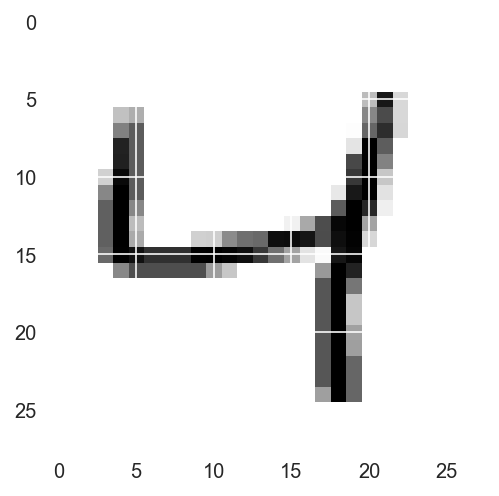

Observation index: 2. Class: 4.


In [11]:
# Configuring the appearance of ``seaborn`` graphics in this notebook
%config InlineBackend.figure_formats = set(['retina'])

import gzip
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Selecting the training data from the original dataset
f = open('data/mnist.pkl', 'rb')
X, y = pickle.load(f, encoding='latin1')[0]
f.close()

# Subsampling
sample_size = 2000
X, y = X[:sample_size], y[:sample_size]

i = 2
plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print('Observation index: {0}. Class: {1}.'.format(i, y[i]))



# Question 1
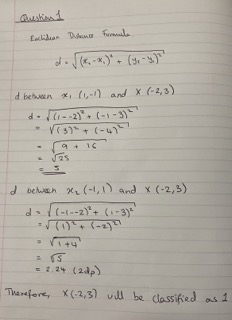

# Question 2

K-nearest neighbors predicts a label of a new object by considering the nearest neighbors around that instance. The number of neighbors (k) considered is set by the experimenter and in practice it is best to set k to an odd value as you are guaranteed to avoid a tie-break (if classifying two different classes). If the number of classes is greater than 2 then it is possible to have a tie-break regardless of an odd k-value. For example, classes 0,1 and 2 have three instances each.

If k=1 then it is impossible to have a tie-break regardless of number of classifying classes because there is no comparison with the number of other neigbors.



# Question 3

Accuracy of a classifier is the percentage of correctly classified instances and is the most effective when the distribution of classes is relatively balanced [1]. When the number of different classes is severly unbalanced (class imbalance problem) where the main interest is rare (i.e. fraudulent activities or cancer detection) the calculated accuracy may seem high, but that is due to the skewness of class distribution. In this case using precision, recall and F1-score is a better metric to evaluate the model.


[1] Data Mining: Concepts and Techniques, Jiawei Han, Micheline Kamber, 2011

# Question 4
Precision conveys the fraction or percentage of ... and is calculated by the number of true positives (TP) divided by the sum of true positives and false positives (FP). Using our example, out of all those examples classified as y (positive class), precision is the percentage of truely y. Having perfect precision of 1.0 means that every label classified does indeed belong to that class, however it does not capture the number of mislabeled examples.

$Precision = \frac{TP}{TP+FP}$ [1]


Recall is the number of true positives (TP) divided by the sum of true positives plus false negatives (FN). Using the question's example, out of all the y (postive class) examples, recall is the percentage of those correctly labeled y. Having a recall of 0.1 means that only 10% of all instances of label y were correctly labelled indicated a vast amount of false negatives. 

$Recall = \frac{TP}{TP+FN}$ [1]

Considering a precision of 1.0 and recall of 0.1 for the y (positive class) label, an observation that is predicted to not belong to class y can be trusted. Although the low recall score this only relates to the positive class not alternative negative class.
HAVE A LOOK

[1] Data Mining: Concepts and Techniques, Jiawei Han, Micheline Kamber, 2011

# Question 5
From inspection of the confusion matrix it was clear that nine (9) was missclassified as four (4) the most frequently, occuring four times, and vice-versa four was missclasified at nine three times. A possible reason for this missclassification is due to how people handwrite the number 4 and 9. Looking at the two numbers objectively it consists of a loop at the top, followed by the line trailing off below so it is easy to understand how the missclassifications occured.

# Question 6

In [12]:
# Importing the support vector machine classifier and metrics
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
# Subsampling
sample_size = 2000
X, y = X[:sample_size], y[:sample_size]
# splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# declaring the SVM classifier 
svm = SVC() 
# fitting the classifier to the data
svm.fit(X_train, y_train)
# making predictions on the unseen X_test data
y_pred = svm.predict(X_test)

print("Accuracy using Support Vector Machine:",metrics.accuracy_score(y_test, y_pred))

Accuracy using Support Vector Machine: 0.92


# Question 7

In [13]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# set n_estimators=100
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# fitting model to the training data
rfc.fit(X_train, y_train)
# 
print('Random Forest Classifier accuracy on test data: {0}.'.format(rfc.score(X_test, y_test)))

Random Forest Classifier accuracy on test data: 0.915.


In [14]:
from sklearn.model_selection import GridSearchCV

# setting the parameter dictionary
param_grid = {'n_estimators': [50,100, 200],
    'max_features': [0.1,0.25]}
# Cross-validation for the random forest classifier 
rfc_CV = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
# fitting to the train data
rfc_CV.fit(X_train, y_train)

# printing out the best hyperparameter setting, average accuracy 
# and accuracy based using the best hyperparameter settings
print('Best hyperparameter setting: {0} \n'.format(rfc_CV.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}. \n'.format(rfc_CV.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}. \n'.format(rfc_CV.score(X_test, y_test)))

Best hyperparameter setting: RandomForestClassifier(max_features=0.25, n_estimators=200, random_state=42) 

Average accuracy across folds of best hyperparameter setting: 0.9081250000000001. 

Test dataset accuracy of best hyperparameter setting: 0.9075. 

